In [1]:
from numpy import *
from scipy import *
import numpy as np
from matplotlib import *

from scipy import integrate
from scipy import interpolate
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

import xlrd
import xlsxwriter

rc('text',usetex = True)
rc('font', family='serif',size = 12)

In [2]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
Eff = Data.sheet_by_name('Eff')


Effect = []

for i in range(7):
     Effect.append(array(Eff.col_values(i)))

phi = np.arange(0.1,2.01,0.1)
NTU = np.arange(50,351,50)
NN,PP = np.meshgrid(NTU,phi)
Effectiv = interpolate.interp2d(phi,NTU,Effect,kind = 'linear')

In [3]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Cold')

m_f_HEx_c   = array(HEx.col_values(0)) 
Ec_HEx_c   = array(HEx.col_values(1)) 
W_T_HEx_c   = array(HEx.col_values(2)) 
W_f_HEx_c   = array(HEx.col_values(3)) 
W_p_HEx_c   = array(HEx.col_values(4)) 

In [4]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Hot')

m_f_HEx_h   = array(HEx.col_values(0)) 
Ec_HEx_h   = array(HEx.col_values(1)) 
W_T_HEx_h   = array(HEx.col_values(2)) 
W_f_HEx_h   = array(HEx.col_values(3)) 
W_p_HEx_h   = array(HEx.col_values(4)) 

def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    for i in range(A,B):
        print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[C]) and ECr < Ec_HEx[i]:
            C = i
            #print('oic',C)
    for i in range(B,A,-1):
        print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[D]) and ECr > Ec_HEx[i]:
            D = i
            #print('oid',D)
    print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [5]:
def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    #print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    #print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    Ref_C = 1
    Ref_D = 0
    for i in range(A,B):
        #print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ref_C) and ECr < Ref_C:
            C = i
            Ref_C = Ec_HEx[i]
            #print('oic',C)
    for i in range(B,A,-1):
        #print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ref_D) and ECr > Ref_D:
            D = i
            Ref_D = Ec_HEx[i]
            #print('oid',D)
    #print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [6]:
def Radius(X): 
    R2,R3,B,L_m,L_r = X
    #return (1.41634776*(R2**-1.10684344)*(R3**2.08169412)*(B**0.74232364))
    #return((B/((0.7390256*R2**1.49668268*R3**-2.71694101)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.23379933))
    return((B/((0.74794602381*R2**1.50307868*R3**-2.73422634)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.240075))

In [7]:
Radius((150,180,1,300,150))

298.85591336001306

In [8]:
def Qc(X): 
    P1,P2,P3,P4,P5= X #Q_pas_CB,Q_act_CB,Q_span,W_mag,W_p
    #return (0.5124256*P1+0.573295*P2-0.52893772*P3-0.00821663*P4-1.2800057*P5)
    #return(0.46851473*P1 + 0.64301304*P2 -0.48044966*P3+0.02032531*P4 -P5)
    return(0.38587129*P1+0.64294648*P2-0.40428582*P3-0.01662812*P4-P5)

In [9]:
def Qh(X): 
    P1,P2,P3,P4,P5= X
    #return (0.7308924*P1+1.31973655*P2-0.7599739*P3+0.01339801*P4-0.85528785*P5)
    #return(0.98097574*P1+1.15711871*P2-0.98056457*P3+0.02958954*P4+P5)
    return(1.04758335*P1+1.20415137*P2-1.04778779*P3+0.03265983*P4+P5)  

In [10]:
def W_Hex(X):
    P1,P2 = X
    return (a*P1**b + c*P2**d)

In [11]:
def Prop_param(X):
    T_c,T_h,B = X
    C_H = 1.65161038/100*T_c+2.59946197*T_h-1.14324309*100*B
    C_L = 10.16443738*T_c-5.32568341*T_h-0.71305997*B
    dT_mg = -0.01057708*T_c+0.01163704*T_h+1.73509682*B
    dT_dmg = -0.01229483*T_c+0.01376157*T_h+0.76454655*B
    CdT_mg = -9.517569*T_c+11.49711993*T_h+820.04168503*B
    CdT_dmg = 4.39480124*T_c-7.07931118/10*T_h+9.15928168*100*B
    return(C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg)

In [12]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx') #Import inputs File
Inputs = Data.sheet_by_name('Data') 

L   = array(Inputs.col_values(0)) #Import AMR Length [mm]
H   = array(Inputs.col_values(1)) #Import AMR Height [mm]
W   = array(Inputs.col_values(2)) #Import AMR Width [mm]
T_c = array(Inputs.col_values(3))+273.15 #Import temperature span [K]
T_h = array(Inputs.col_values(4))+273.15 #Import temperature span [K]
B   = array(Inputs.col_values(5)) #Import magnetic field [T]
f   = array(Inputs.col_values(6)) #Import frequency [Hz]
m_f = array(Inputs.col_values(7))/3600 #Import mass flow rate [kg/h]
Q_c = array(Inputs.col_values(8)) #Import Cooling capacity [W]
Q_h = array(Inputs.col_values(9)) #Import Rejected heat [W]
W_p = array(Inputs.col_values(10)) #Import Pumping power [W]
W_m = array(Inputs.col_values(11)) #Import Magnetic power [W]
T_c_ml = array(Inputs.col_values(12))+273.15 #Import temperature span [K]
T_h_ml = array(Inputs.col_values(13))+273.15 #Import temperature span [K]

Calculation

In [34]:
def Optimal(m_f,FE,f,L,H,W,B,Tc,Th,Tce,The,L_xt):
    
    ##Properties of the solid 
    #rho_s = 7900  #[kg/m3] Density of the solid
    #k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

    ## Propertis of the fluid
    #rho_f = 1000  #[kg/m3] Density of the fluid
    #c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
    #Pr_f  = 6.136 #[-] Prandtl of the fluid
    #mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
    #k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

    ## Porous medium
    #d_p = 500*10**(-6) #[m] Particle diameter
   
    #Epsilon = 0.45 #0.55  #[-] Porosity
    #Epsilon_dp = 0.36 #0.465 #[-] Porosity
    #d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p #290*10**(-6) #[m] Particle diameter
        
    #Magnetic Circuit
    #B_rem = 1.43
    #N_p = 2
    #N_Rp = 2
    
    ### CALCULATION ###
    
    #Porous medium
    m_s   = L*W*H*10**-9*(1-Epsilon)*rho_s #mass of the AMR
    Beta = (1-Epsilon)*6/d_p
    v_s   = (m_f)/(rho_f*W*H*10**-6) #Superficial velocity

    #Dimensionless Numbers
    Re_dp = d_p*v_s*rho_f/(mu_f) #Reynolds number
    Nu = 2*(1+4*(1-Epsilon)/Epsilon)+((1-Epsilon)**0.5)*Re_dp**0.6*Pr_f**(1/3) # Nusselt number
    Pe = Re_dp*Pr_f
    h_int = Nu*k_f/d_p
    NTU_f  = h_int*Beta*(L*W*H*10**(-9))/(m_f*c_f) 
    #dP = (L/1000)*(150*(1-Epsilon_dp)**2*mu_f*v_s/(Epsilon_dp**3*d_p**2) + 1.75*(1-Epsilon_dp)*rho_f*v_s**2/(Epsilon_dp**3*d_p))
    
    dP = 0.5*413.11*(v_s*d_ph*rho_f/mu_f)**-0.514*rho_f*v_s**2*(L/1000)/d_ph
    #print(dP/dP_1)
    
    #Effective conduction
    #k_e_f = k_f*Epsilon #Fluid effective conduction

    #a_0 = exp(-1.084-6.778*(Epsilon-0.298))
    #f_0 = 0.8
    #k_e_s = k_f*((1-a_0)*(Epsilon*f_0+(1-Epsilon*f_0)*k_s/k_f)/(1-Epsilon*(1-f_0)+k_s/k_f*Epsilon*(1-f_0))+a_0*(2*((k_s/k_f)**2)*(1-Epsilon)+(1+2*Epsilon)*k_s/k_f)/((2+Epsilon)*k_s/k_f+(1-Epsilon))) #Solid effective conduction

    #D_ = (k_f*rho_f/c_f)*0.75*Pe/2

    #k_s_eff = k_e_s
    #k_f_eff = k_e_f + rho_f*c_f*D_
    
    ##### Properties Calculation ######   
    C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg = Prop_param((Tce,The,B))

    ##### Porous media effectivness #####

    C_HB = ((m_f)*c_f)/(m_s*C_L*f)
    C_CB = ((m_f)*c_f)/(m_s*C_H*f)

    Efness_HB = Effectiv(C_HB/2,NTU_f)
    Efness_CB = Effectiv(C_CB/2,NTU_f)

    #print(Efness_HB,Efness_CB,h_int,Nu,v_s,Re_dp)


    ## Metrics ##

    Q_pas_CB = Efness_CB*(The - Tce)*m_f*FE*c_f
    Q_act_CB = dT_mg*m_f*c_f*FE

    Q_pas_HB = Efness_HB*(The - Tce)*m_f*FE*c_f
    Q_act_HB = dT_dmg*m_f*c_f*FE

    Q_span = (The - Tce)*m_f*c_f*FE
    #Q_cond = ((1-Epsilon)*k_s_eff + Epsilon*k_f_eff)*(W*H*10**-6)*(The-Tce)/L
    W_mag  = m_s*f*(CdT_mg - CdT_dmg)
    W_pump = dP*m_f/rho_f*2*(FE)
    #print(Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump)

    ######Calculation#######
    
    N_reg = 4/FE
    
    R2 = [W/2+2.5]/np.tan(np.pi/N_reg)
    R_aux = np.sqrt(R2**2-(W/2**2))
    R3 = np.sqrt((H+8+R_aux)**2+(W/2)**2)
    
    FL = (0.45238549*(1+L_xt)**3-2.34797947*(1+L_xt)**2 +4.06737728*(1+L_xt)-1.44601011)*R2**-0.14716104*R3**(0.15172723)
    
    Qc_reg = Qc((Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump))*FL
    Qh_reg = Qh((Q_pas_HB,Q_act_HB,Q_span,W_mag,W_pump))*FL
    #print(Qc_reg,Qh_reg)
    #N_reg = Qc_target/Qc_reg
    Qc_target = Qc_reg*N_reg 
    Qh_target = Qh_reg*N_reg

    ECr_c = Qc_target/(FE*N_reg*m_f*c_f*(Tc-Tce))
    ECr_h = Qh_target/(FE*N_reg*m_f*c_f*(The-Th))
    
    B_rem = 1.43
    

    R4 = Radius((R2,R3,B/B_rem,L*(1+L_xt),L))
    
    W_mag = Qh_reg - Qc_reg - W_pump
    
    
    return (Qc_target,ECr_c,ECr_h,R4,R3,R2,W_mag,W_pump,Qh_target,L_xt,FL)

Qc_rg = []
Qh_rg = []
W_pump_rg =[]
ECr_c = []
ECr_h = []
N_r = []
R2 = []
R3 = []
R4 = []

for i in range(len(L)):                          
    A1,A2,A3,A4,A5,A6,A7,A8,A9 = Optimal(m_f[i],0.25,f[i],L[i],H[i],W[i],B[i],22+273.15,35+273.15,T_c[i],T_h[i])
    Qc_rg.append(A1)
    Qh_rg.append(A9)
    W_pump_rg.append(A8)
    ECr_c.append(A2)
    ECr_h.append(A3)
    N_r.append(A6)
    R2.append(A6)
    R3.append(A5)
    R4.append(A4)

In [14]:
plt.plot(W_p,m_p,'o')

NameError: name 'm_p' is not defined

In [15]:
L

array([140., 140., 140., 140., 140., 140., 160., 140., 140., 140., 140.,
       140., 140., 140., 140., 140., 140., 140., 160., 140., 160., 140.,
       140., 140., 140., 140., 160., 140., 160., 140., 140., 140., 140.,
       140., 140., 140., 140., 140., 140., 140., 140., 140., 160., 140.,
       160., 140., 160., 140., 140., 140., 140., 160., 140., 140., 160.,
       140., 140., 140., 140., 140., 140., 140., 140., 160., 160., 140.,
       140., 140., 140., 140., 140., 160., 140., 140., 160., 140., 160.,
       140., 140., 160., 140., 140., 140., 160., 160., 160., 140., 140.,
       160., 140., 140., 160., 160., 140., 160., 140., 160., 160., 140.,
       140., 160., 160., 140., 160., 160., 140., 160., 160., 160., 140.,
       160., 140., 140., 140., 160., 160., 160., 140., 140., 140., 140.,
       140., 160., 160., 140., 140., 160., 160., 160., 160., 160., 140.,
       160., 140., 160., 160., 140., 140., 160., 160., 160., 140., 160.,
       160., 160., 160., 160., 160., 140., 140., 14

In [557]:
L

array([55, 60, 65, 70, 75, 80])

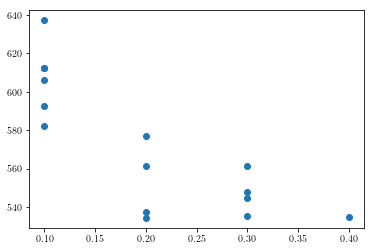

In [667]:
plt.plot(L_xt_p,m_p,'o')

In [696]:
m_f = np.arange(700,1201,5)/3600
FE  = np.arange(25/100,30/100,5/100) 
f = np.arange(3,3.1,0.5)
L = np.arange(140,161,10)
H = np.arange(35,60,5)
W = np.arange(25,60,5)
B_max = np.arange(1.24,1.45,0.05)
Tce = np.arange(16,17,4)
The = np.arange(40,44,4)
L_xt = np.arange(0.3,0.55,0.05)

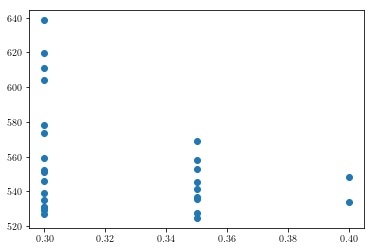

In [697]:
plt.plot(L_xt_p,m_p,'o')

m_f = np.arange(800,801,5)/3600
FE  = np.arange(25/100,30/100,5/100) 
f = np.arange(1.5,1.9,0.5)
L = np.arange(150,159,10)
H = np.arange(50,51,5)
W = np.arange(60,61,5)
B_max = np.arange(1.3,1.34,0.05)
Tce = np.arange(14,15,2)
The = np.arange(42,43,2)
L_xt = np.arange(0.5,0.6,0.2)

In [698]:
len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)

3150

m_f = 600/3600
FE = 0.25
f = 2.25
L = 140
H = 20
W = 60
B_max = 1.5
T_c  = 22
T_h = 35
Tce = 14
The = 43

A = Optimal(m_f,FE,f,L,H,W,B_max,T_c+273.15,T_h+273.15,Tce+273.15,The+273.15,L_xt)
A[0][0]/16

In [699]:
Q_c = []
cont = 0

T_c = 22
T_h = 35

Q_c_target = 2900

m_f_target = []
FE_target = []
f_target = []
L_target = []
H_target = []
W_target = []
Tce_target = []
The_target = []
ECr_c = []
ECr_h = []
R4 = []
R3 = []
R2 = []
W_mag = []
W_pump = []
B_target = []
Q_h = []
L_xt_target = []
FL_target = []

##Properties of the solid 
rho_s = 7900  #[kg/m3] Density of the solid
k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

## Propertis of the fluid
rho_f = 1000  #[kg/m3] Density of the fluid
c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
Pr_f  = 6.136 #[-] Prandtl of the fluid
mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

## Porous medium
d_p = 500*10**(-6) #[m] Particle diameter

Epsilon = 0.45 #0.55  #[-] Porosity
Epsilon_dp = 0.36 #0.465 #[-] Porosity
d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p #290*10**(-6) #[m] Particle diameter

#Magnetic Circuit
B_rem = 1.43
N_p = 2
N_Rp = 2

for i in range(size(FE)):
    for j in range(len(f)):
        for k in range(len(L)):
            for l in range(len(H)):
                for m in range(len(W)):
                    for n in range(len(Tce)):
                        for o in range(len(The)):
                            for p in range(len(B_max)):
                                for q in range(len(L_xt)):
                                    it = 0
                                    Q_c_system = 0
                                    while Q_c_system < Q_c_target and it < len(m_f):
                                        A,B,C,D,E,F,G,A1,A2,A3,A4 = Optimal(m_f[it],FE[i],f[j],L[k],H[l],W[m],B_max[p],T_c+273.15,T_h+273.15,Tce[n]+273.15,The[o]+273.15,L_xt[q])
                                        Q_c_system = A[0]
                                        it = it + 1
                                        #print(A,B,C,D,E,F,G,A1,A2,A3)
                                        #print(m_f[it-1]*3600,Q_c_system )
                                    #print(it,Q_c_system)
                                    if Q_c_system > Q_c_target:
                                        Q_c.append(Q_c_system)
                                        m_f_target.append(3600*m_f[it-1])
                                        FE_target.append(FE[i])
                                        f_target.append(f[j])
                                        L_target.append(L[k])
                                        H_target.append(H[l])
                                        W_target.append(W[m])
                                        Tce_target.append(Tce[n])
                                        The_target.append(The[o])
                                        B_target.append(B_max[p])
                                        ECr_c.append(B[0])
                                        ECr_h.append(C[0])
                                        R4.append(D[0])
                                        R3.append(E[0])
                                        R2.append(F[0])
                                        W_mag.append(G[0])
                                        W_pump.append(A1)
                                        Q_h.append(A2[0])
                                        L_xt_target.append(A3)
                                        FL_target.append(A4)

                                    cont = cont+1
                                    print(100*cont/(len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)))
                            

0.031746031746031744
0.06349206349206349
0.09523809523809523
0.12698412698412698
0.15873015873015872
0.19047619047619047
0.2222222222222222
0.25396825396825395
0.2857142857142857
0.31746031746031744
0.3492063492063492
0.38095238095238093
0.4126984126984127
0.4444444444444444
0.47619047619047616
0.5079365079365079
0.5396825396825397
0.5714285714285714
0.6031746031746031
0.6349206349206349
0.6666666666666666
0.6984126984126984
0.7301587301587301
0.7619047619047619
0.7936507936507936
0.8253968253968254
0.8571428571428571
0.8888888888888888
0.9206349206349206
0.9523809523809523
0.9841269841269841
1.0158730158730158
1.0476190476190477
1.0793650793650793
1.1111111111111112
1.1428571428571428
1.1746031746031746
1.2063492063492063
1.2380952380952381
1.2698412698412698
1.3015873015873016
1.3333333333333333
1.3650793650793651
1.3968253968253967
1.4285714285714286
1.4603174603174602
1.492063492063492
1.5238095238095237
1.5555555555555556
1.5873015873015872
1.619047619047619
1.6507936507936507
1.6

14.34920634920635
14.380952380952381
14.412698412698413
14.444444444444445
14.476190476190476
14.507936507936508
14.53968253968254
14.571428571428571
14.603174603174603
14.634920634920634
14.666666666666666
14.698412698412698
14.73015873015873
14.761904761904763
14.793650793650794
14.825396825396826
14.857142857142858
14.88888888888889
14.920634920634921
14.952380952380953
14.984126984126984
15.015873015873016
15.047619047619047
15.079365079365079
15.11111111111111
15.142857142857142
15.174603174603174
15.206349206349206
15.238095238095237
15.26984126984127
15.301587301587302
15.333333333333334
15.365079365079366
15.396825396825397
15.428571428571429
15.46031746031746
15.492063492063492
15.523809523809524
15.555555555555555
15.587301587301587
15.619047619047619
15.65079365079365
15.682539682539682
15.714285714285714
15.746031746031745
15.777777777777779
15.80952380952381
15.841269841269842
15.873015873015873
15.904761904761905
15.936507936507937
15.968253968253968
16.0
16.0317460317460

33.682539682539684
33.714285714285715
33.74603174603175
33.77777777777778
33.80952380952381
33.84126984126984
33.87301587301587
33.904761904761905
33.93650793650794
33.96825396825397
34.0
34.03174603174603
34.06349206349206
34.095238095238095
34.12698412698413
34.15873015873016
34.19047619047619
34.22222222222222
34.25396825396825
34.285714285714285
34.317460317460316
34.34920634920635
34.38095238095238
34.41269841269841
34.44444444444444
34.476190476190474
34.507936507936506
34.53968253968254
34.57142857142857
34.6031746031746
34.63492063492063
34.666666666666664
34.698412698412696
34.73015873015873
34.76190476190476
34.79365079365079
34.82539682539682
34.857142857142854
34.888888888888886
34.92063492063492
34.95238095238095
34.98412698412698
35.01587301587302
35.04761904761905
35.07936507936508
35.111111111111114
35.142857142857146
35.17460317460318
35.20634920634921
35.23809523809524
35.26984126984127
35.301587301587304
35.333333333333336
35.36507936507937
35.3968253968254
35.428571

53.682539682539684
53.714285714285715
53.74603174603175
53.77777777777778
53.80952380952381
53.84126984126984
53.87301587301587
53.904761904761905
53.93650793650794
53.96825396825397
54.0
54.03174603174603
54.06349206349206
54.095238095238095
54.12698412698413
54.15873015873016
54.19047619047619
54.22222222222222
54.25396825396825
54.285714285714285
54.317460317460316
54.34920634920635
54.38095238095238
54.41269841269841
54.44444444444444
54.476190476190474
54.507936507936506
54.53968253968254
54.57142857142857
54.6031746031746
54.63492063492063
54.666666666666664
54.698412698412696
54.73015873015873
54.76190476190476
54.79365079365079
54.82539682539682
54.857142857142854
54.888888888888886
54.92063492063492
54.95238095238095
54.98412698412698
55.01587301587302
55.04761904761905
55.07936507936508
55.111111111111114
55.142857142857146
55.17460317460318
55.20634920634921
55.23809523809524
55.26984126984127
55.301587301587304
55.333333333333336
55.36507936507937
55.3968253968254
55.428571

68.31746031746032
68.34920634920636
68.38095238095238
68.41269841269842
68.44444444444444
68.47619047619048
68.5079365079365
68.53968253968254
68.57142857142857
68.60317460317461
68.63492063492063
68.66666666666667
68.6984126984127
68.73015873015873
68.76190476190476
68.7936507936508
68.82539682539682
68.85714285714286
68.88888888888889
68.92063492063492
68.95238095238095
68.98412698412699
69.01587301587301
69.04761904761905
69.07936507936508
69.11111111111111
69.14285714285714
69.17460317460318
69.2063492063492
69.23809523809524
69.26984126984127
69.3015873015873
69.33333333333333
69.36507936507937
69.39682539682539
69.42857142857143
69.46031746031746
69.4920634920635
69.52380952380952
69.55555555555556
69.58730158730158
69.61904761904762
69.65079365079364
69.68253968253968
69.71428571428571
69.74603174603175
69.77777777777777
69.80952380952381
69.84126984126983
69.87301587301587
69.9047619047619
69.93650793650794
69.96825396825396
70.0
70.03174603174604
70.06349206349206
70.095238095

86.98412698412699
87.01587301587301
87.04761904761905
87.07936507936508
87.11111111111111
87.14285714285714
87.17460317460318
87.2063492063492
87.23809523809524
87.26984126984127
87.3015873015873
87.33333333333333
87.36507936507937
87.39682539682539
87.42857142857143
87.46031746031746
87.4920634920635
87.52380952380952
87.55555555555556
87.58730158730158
87.61904761904762
87.65079365079364
87.68253968253968
87.71428571428571
87.74603174603175
87.77777777777777
87.80952380952381
87.84126984126983
87.87301587301587
87.9047619047619
87.93650793650794
87.96825396825396
88.0
88.03174603174604
88.06349206349206
88.0952380952381
88.12698412698413
88.15873015873017
88.19047619047619
88.22222222222223
88.25396825396825
88.28571428571429
88.31746031746032
88.34920634920636
88.38095238095238
88.41269841269842
88.44444444444444
88.47619047619048
88.5079365079365
88.53968253968254
88.57142857142857
88.60317460317461
88.63492063492063
88.66666666666667
88.6984126984127
88.73015873015873
88.761904761

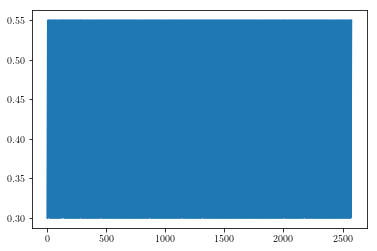

In [700]:
plt.plot(L_xt_target)

In [701]:
N_circ_cold = 6
N_circ_hot = 8

W_FT_c = np.zeros(len(m_f_target))
W_Ff_c = np.zeros(len(m_f_target))
W_Fp_c = np.zeros(len(m_f_target))

W_FT_h = np.zeros(len(m_f_target))
W_Ff_h = np.zeros(len(m_f_target))
W_Fp_h = np.zeros(len(m_f_target))


for i in range(len(m_f_target)):
    print(i/len(m_f_target))
    [W_FT_c[i],W_Ff_c[i],W_Fp_c[i]] = HEx_Power(m_f_HEx_c,W_T_HEx_c,W_f_HEx_c,W_p_HEx_c,Ec_HEx_c,4*m_f_target[i]/N_circ_cold,ECr_c[i])
    [W_FT_h[i],W_Ff_h[i],W_Fp_h[i]] = HEx_Power(m_f_HEx_h,W_T_HEx_h,W_f_HEx_h,W_p_HEx_h,Ec_HEx_h,4*m_f_target[i]/N_circ_hot,ECr_h[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_c[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_h[i])

0.0
0.00038804811796662784
0.0007760962359332557
0.0011641443538998836
0.0015521924718665113
0.0019402405898331393
0.002328288707799767
0.002716336825766395
0.0031043849437330227
0.0034924330616996507
0.0038804811796662787
0.004268529297632906
0.004656577415599534
0.005044625533566162
0.00543267365153279
0.005820721769499418
0.006208769887466045
0.006596818005432673
0.006984866123399301
0.007372914241365929
0.007760962359332557
0.008149010477299184
0.008537058595265812
0.00892510671323244
0.009313154831199068
0.009701202949165696
0.010089251067132324
0.010477299185098952
0.01086534730306558
0.011253395421032208
0.011641443538998836
0.012029491656965464
0.01241753977493209
0.012805587892898719
0.013193636010865347
0.013581684128831975
0.013969732246798603
0.01435778036476523
0.014745828482731859
0.015133876600698487
0.015521924718665115
0.01590997283663174
0.01629802095459837
0.016686069072564997
0.017074117190531625
0.017462165308498253
0.01785021342646488
0.01823826154443151
0.0186263

0.16181606519208383
0.16220411331005044
0.16259216142801708
0.1629802095459837
0.16336825766395033
0.16375630578191697
0.16414435389988358
0.16453240201785022
0.16492045013581685
0.16530849825378346
0.1656965463717501
0.1660845944897167
0.16647264260768335
0.16686069072565
0.1672487388436166
0.16763678696158324
0.16802483507954988
0.1684128831975165
0.16880093131548313
0.16918897943344974
0.16957702755141638
0.16996507566938301
0.17035312378734963
0.17074117190531626
0.17112922002328287
0.1715172681412495
0.17190531625921615
0.17229336437718276
0.1726814124951494
0.17306946061311604
0.17345750873108265
0.1738455568490493
0.1742336049670159
0.17462165308498254
0.17500970120294917
0.17539774932091579
0.17578579743888242
0.17617384555684906
0.17656189367481567
0.1769499417927823
0.17733798991074892
0.17772603802871556
0.1781140861466822
0.1785021342646488
0.17889018238261545
0.17927823050058206
0.1796662786185487
0.18005432673651534
0.18044237485448195
0.18083042297244858
0.18121847109041

0.32945285215366704
0.3298409002716337
0.3302289483896003
0.33061699650756693
0.33100504462553354
0.3313930927435002
0.3317811408614668
0.3321691889794334
0.3325572370974001
0.3329452852153667
0.3333333333333333
0.3337213814513
0.3341094295692666
0.3344974776872332
0.33488552580519987
0.3352735739231665
0.3356616220411331
0.33604967015909976
0.33643771827706637
0.336825766395033
0.3372138145129996
0.33760186263096625
0.33798991074893286
0.3383779588668995
0.33876600698486614
0.33915405510283275
0.33954210322079936
0.33993015133876603
0.34031819945673264
0.34070624757469925
0.3410942956926659
0.3414823438106325
0.34187039192859914
0.34225844004656575
0.3426464881645324
0.343034536282499
0.34342258440046564
0.3438106325184323
0.3441986806363989
0.3445867287543655
0.3449747768723322
0.3453628249902988
0.3457508731082654
0.3461389212262321
0.3465269693441987
0.3469150174621653
0.3473030655801319
0.3476911136980986
0.3480791618160652
0.3484672099340318
0.34885525805199846
0.3492433061699651

0.505626697710516
0.5060147458284827
0.5064027939464494
0.5067908420644159
0.5071788901823826
0.5075669383003493
0.5079549864183158
0.5083430345362825
0.5087310826542492
0.5091191307722157
0.5095071788901824
0.509895227008149
0.5102832751261156
0.5106713232440823
0.5110593713620489
0.5114474194800155
0.5118354675979822
0.5122235157159488
0.5126115638339154
0.512999611951882
0.5133876600698487
0.5137757081878153
0.5141637563057819
0.5145518044237486
0.5149398525417151
0.5153279006596818
0.5157159487776485
0.516103996895615
0.5164920450135817
0.5168800931315483
0.5172681412495149
0.5176561893674816
0.5180442374854481
0.5184322856034148
0.5188203337213815
0.519208381839348
0.5195964299573147
0.5199844780752814
0.5203725261932479
0.5207605743112146
0.5211486224291813
0.5215366705471478
0.5219247186651145
0.5223127667830811
0.5227008149010477
0.5230888630190144
0.523476911136981
0.5238649592549476
0.5242530073729142
0.5246410554908809
0.5250291036088475
0.5254171517268141
0.5258051998447808

0.6748156771439658
0.6752037252619325
0.6755917733798991
0.6759798214978657
0.6763678696158324
0.676755917733799
0.6771439658517656
0.6775320139697323
0.6779200620876988
0.6783081102056655
0.6786961583236322
0.6790842064415987
0.6794722545595654
0.6798603026775321
0.6802483507954986
0.6806363989134653
0.681024447031432
0.6814124951493985
0.6818005432673652
0.6821885913853318
0.6825766395032984
0.682964687621265
0.6833527357392316
0.6837407838571983
0.6841288319751649
0.6845168800931315
0.6849049282110982
0.6852929763290648
0.6856810244470314
0.686069072564998
0.6864571206829647
0.6868451688009313
0.6872332169188979
0.6876212650368646
0.6880093131548312
0.6883973612727978
0.6887854093907645
0.689173457508731
0.6895615056266977
0.6899495537446644
0.6903376018626309
0.6907256499805976
0.6911136980985643
0.6915017462165308
0.6918897943344975
0.6922778424524642
0.6926658905704307
0.6930539386883974
0.693441986806364
0.6938300349243306
0.6942180830422973
0.6946061311602638
0.6949941792782305

0.8463329452852154
0.846720993403182
0.8471090415211486
0.8474970896391153
0.8478851377570819
0.8482731858750485
0.8486612339930152
0.8490492821109817
0.8494373302289484
0.8498253783469151
0.8502134264648816
0.8506014745828483
0.8509895227008148
0.8513775708187815
0.8517656189367482
0.8521536670547147
0.8525417151726814
0.8529297632906481
0.8533178114086146
0.8537058595265813
0.854093907644548
0.8544819557625145
0.8548700038804812
0.8552580519984478
0.8556461001164144
0.8560341482343811
0.8564221963523477
0.8568102444703143
0.857198292588281
0.8575863407062476
0.8579743888242142
0.8583624369421808
0.8587504850601475
0.8591385331781141
0.8595265812960807
0.8599146294140474
0.860302677532014
0.8606907256499806
0.8610787737679473
0.8614668218859138
0.8618548700038805
0.8622429181218471
0.8626309662398137
0.8630190143577804
0.863407062475747
0.8637951105937136
0.8641831587116803
0.8645712068296468
0.8649592549476135
0.8653473030655802
0.8657353511835467
0.8661233993015134
0.86651144741948


In [702]:
W_FT_c,4*m_f_target[19]/6

(array([197.63786788, 195.50465472, 186.87574864, ..., 304.25163219,
        305.88712429, 306.97809586]), 466.6666666666667)

In [703]:
W_p_valve = (2*np.array(m_f_target)/4/1000)**2*10**5**(2*np.array(m_f_target)/3600)/1000*4/np.array(FE_target)
W_valve   = 8*16

In [704]:
m_La = 4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(1-0.45)*7000*10**-9
m_Rt = np.pi*((np.array(R4))**2-np.array(R3)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_St = np.pi*((np.array(R2)**2))*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500
m_Fe = np.pi*((np.array(R4)+40)**2-np.array(R4)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_Nd = m_Rt + m_St + m_Fe
m_w  = (4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(0.465)*1000*10**-9)

In [705]:
m_T = m_La + m_Rt + m_St + m_Fe + m_w
W_T = W_Ff_c + W_Ff_h + W_Fp_c + W_Fp_h +np.array(W_mag)*4/np.array(FE_target) + np.array(W_pump)*4/np.array(FE_target) + W_valve + W_p_valve

In [681]:
m_p = []
W_pa =[]

m_Nd_p = []
m_La_p = []
m_w_p = []

W_p_CHEx_p = []
W_p_CHEx_f = []
W_p_HHEx_p = []
W_p_HHEx_f = []
W_p_mag = []
W_p_pump = []
W_pa_valve = []
W_pa_p_valve = []


m_f_p = []
FE_p  =[]
f_p = []
L_p = []
H_p = []
W_p = []
B_max_p = []
Tce_p = []
The_p = []

R2_p = []
R3_p = []
R4_p = []
L_xt_p = []


for i in range(len(m_T)):
    print(i/len(m_T))
    A = 0
    for j in  range(len(m_T)):
        if (m_T[i] >= m_T[j] and W_T[i] > W_T[j]) or (m_T[i] > m_T[j] and W_T[i] >= W_T[j]):
            A = 1
    if A == 0 :
        #print(m_T[i],W_T[i])
        m_p.append(m_T[i])
        m_Nd_p.append(m_Nd[i])
        m_La_p.append(m_La[i])
        m_w_p.append(m_w[i])
        
        m_f_p.append(m_f_target[i])
        FE_p.append(FE_target[i])
        f_p.append(f_target[i])
        L_p.append(L_target[i])
        H_p.append(H_target[i])
        W_p.append(W_target[i])
        B_max_p.append(B_target[i])
        Tce_p.append(Tce_target[i])
        The_p.append(The_target[i])
        
        R2_p.append(R2[i])
        R3_p.append(R3[i])
        R4_p.append(R4[i])
        L_xt_p.append(L_xt_target[i])
        A = Optimal(m_f_target[i]/3600,FE_target[i],f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],T_c+273.15,T_h+273.15,Tce_target[i]+273.15,The_target[i]+273.15,L_xt_target[i])
        #print(A[0],m_f_target[i],FE_target[i],f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],T_c+273.15,T_h+273.15,Tce_target[i]+273.15,The_target[i]+273.15,L_xt_target[i])
        
        W_pa.append(W_T[i])
        W_p_CHEx_p.append(W_Fp_c[i])
        W_p_CHEx_f.append(W_Ff_c[i])
        W_p_HHEx_p.append(W_Fp_h[i])
        W_p_HHEx_f.append(W_Ff_h[i])
        W_p_mag.append(np.array(W_mag[i])*4/np.array(FE_target[i]))
        W_p_pump.append(np.array(W_pump[i])*4/np.array(FE_target[i]))
        W_pa_valve.append(W_valve)
        W_pa_p_valve.append(W_p_valve[i])   

0.0
0.00016
0.00032
0.00048
0.00064
0.0008
0.00096
0.00112
0.00128
0.00144
0.0016
0.00176
0.00192
0.00208
0.00224
0.0024
0.00256
0.00272
0.00288
0.00304
0.0032
0.00336
0.00352
0.00368
0.00384
0.004
0.00416
0.00432
0.00448
0.00464
0.0048
0.00496
0.00512
0.00528
0.00544
0.0056
0.00576
0.00592
0.00608
0.00624
0.0064
0.00656
0.00672
0.00688
0.00704
0.0072
0.00736
0.00752
0.00768
0.00784
0.008
0.00816
0.00832
0.00848
0.00864
0.0088
0.00896
0.00912
0.00928
0.00944
0.0096
0.00976
0.00992
0.01008
0.01024
0.0104
0.01056
0.01072
0.01088
0.01104
0.0112
0.01136
0.01152
0.01168
0.01184
0.012
0.01216
0.01232
0.01248
0.01264
0.0128
0.01296
0.01312
0.01328
0.01344
0.0136
0.01376
0.01392
0.01408
0.01424
0.0144
0.01456
0.01472
0.01488
0.01504
0.0152
0.01536
0.01552
0.01568
0.01584
0.016
0.01616
0.01632
0.01648
0.01664
0.0168
0.01696
0.01712
0.01728
0.01744
0.0176
0.01776
0.01792
0.01808
0.01824
0.0184
0.01856
0.01872
0.01888
0.01904
0.0192
0.01936
0.01952
0.01968
0.01984
0.02
0.02016
0.02032
0.02048
0.0

0.24032
0.24048
0.24064
0.2408
0.24096
0.24112
0.24128
0.24144
0.2416
0.24176
0.24192
0.24208
0.24224
0.2424
0.24256
0.24272
0.24288
0.24304
0.2432
0.24336
0.24352
0.24368
0.24384
0.244
0.24416
0.24432
0.24448
0.24464
0.2448
0.24496
0.24512
0.24528
0.24544
0.2456
0.24576
0.24592
0.24608
0.24624
0.2464
0.24656
0.24672
0.24688
0.24704
0.2472
0.24736
0.24752
0.24768
0.24784
0.248
0.24816
0.24832
0.24848
0.24864
0.2488
0.24896
0.24912
0.24928
0.24944
0.2496
0.24976
0.24992
0.25008
0.25024
0.2504
0.25056
0.25072
0.25088
0.25104
0.2512
0.25136
0.25152
0.25168
0.25184
0.252
0.25216
0.25232
0.25248
0.25264
0.2528
0.25296
0.25312
0.25328
0.25344
0.2536
0.25376
0.25392
0.25408
0.25424
0.2544
0.25456
0.25472
0.25488
0.25504
0.2552
0.25536
0.25552
0.25568
0.25584
0.256
0.25616
0.25632
0.25648
0.25664
0.2568
0.25696
0.25712
0.25728
0.25744
0.2576
0.25776
0.25792
0.25808
0.25824
0.2584
0.25856
0.25872
0.25888
0.25904
0.2592
0.25936
0.25952
0.25968
0.25984
0.26
0.26016
0.26032
0.26048
0.26064
0.2608


0.544
0.54416
0.54432
0.54448
0.54464
0.5448
0.54496
0.54512
0.54528
0.54544
0.5456
0.54576
0.54592
0.54608
0.54624
0.5464
0.54656
0.54672
0.54688
0.54704
0.5472
0.54736
0.54752
0.54768
0.54784
0.548
0.54816
0.54832
0.54848
0.54864
0.5488
0.54896
0.54912
0.54928
0.54944
0.5496
0.54976
0.54992
0.55008
0.55024
0.5504
0.55056
0.55072
0.55088
0.55104
0.5512
0.55136
0.55152
0.55168
0.55184
0.552
0.55216
0.55232
0.55248
0.55264
0.5528
0.55296
0.55312
0.55328
0.55344
0.5536
0.55376
0.55392
0.55408
0.55424
0.5544
0.55456
0.55472
0.55488
0.55504
0.5552
0.55536
0.55552
0.55568
0.55584
0.556
0.55616
0.55632
0.55648
0.55664
0.5568
0.55696
0.55712
0.55728
0.55744
0.5576
0.55776
0.55792
0.55808
0.55824
0.5584
0.55856
0.55872
0.55888
0.55904
0.5592
0.55936
0.55952
0.55968
0.55984
0.56
0.56016
0.56032
0.56048
0.56064
0.5608
0.56096
0.56112
0.56128
0.56144
0.5616
0.56176
0.56192
0.56208
0.56224
0.5624
0.56256
0.56272
0.56288
0.56304
0.5632
0.56336
0.56352
0.56368
0.56384
0.564
0.56416
0.56432
0.56448
0

0.728
0.72816
0.72832
0.72848
0.72864
0.7288
0.72896
0.72912
0.72928
0.72944
0.7296
0.72976
0.72992
0.73008
0.73024
0.7304
0.73056
0.73072
0.73088
0.73104
0.7312
0.73136
0.73152
0.73168
0.73184
0.732
0.73216
0.73232
0.73248
0.73264
0.7328
0.73296
0.73312
0.73328
0.73344
0.7336
0.73376
0.73392
0.73408
0.73424
0.7344
0.73456
0.73472
0.73488
0.73504
0.7352
0.73536
0.73552
0.73568
0.73584
0.736
0.73616
0.73632
0.73648
0.73664
0.7368
0.73696
0.73712
0.73728
0.73744
0.7376
0.73776
0.73792
0.73808
0.73824
0.7384
0.73856
0.73872
0.73888
0.73904
0.7392
0.73936
0.73952
0.73968
0.73984
0.74
0.74016
0.74032
0.74048
0.74064
0.7408
0.74096
0.74112
0.74128
0.74144
0.7416
0.74176
0.74192
0.74208
0.74224
0.7424
0.74256
0.74272
0.74288
0.74304
0.7432
0.74336
0.74352
0.74368
0.74384
0.744
0.74416
0.74432
0.74448
0.74464
0.7448
0.74496
0.74512
0.74528
0.74544
0.7456
0.74576
0.74592
0.74608
0.74624
0.7464
0.74656
0.74672
0.74688
0.74704
0.7472
0.74736
0.74752
0.74768
0.74784
0.748
0.74816
0.74832
0.74848
0

0.96768
0.96784
0.968
0.96816
0.96832
0.96848
0.96864
0.9688
0.96896
0.96912
0.96928
0.96944
0.9696
0.96976
0.96992
0.97008
0.97024
0.9704
0.97056
0.97072
0.97088
0.97104
0.9712
0.97136
0.97152
0.97168
0.97184
0.972
0.97216
0.97232
0.97248
0.97264
0.9728
0.97296
0.97312
0.97328
0.97344
0.9736
0.97376
0.97392
0.97408
0.97424
0.9744
0.97456
0.97472
0.97488
0.97504
0.9752
0.97536
0.97552
0.97568
0.97584
0.976
0.97616
0.97632
0.97648
0.97664
0.9768
0.97696
0.97712
0.97728
0.97744
0.9776
0.97776
0.97792
0.97808
0.97824
0.9784
0.97856
0.97872
0.97888
0.97904
0.9792
0.97936
0.97952
0.97968
0.97984
0.98
0.98016
0.98032
0.98048
0.98064
0.9808
0.98096
0.98112
0.98128
0.98144
0.9816
0.98176
0.98192
0.98208
0.98224
0.9824
0.98256
0.98272
0.98288
0.98304
0.9832
0.98336
0.98352
0.98368
0.98384
0.984
0.98416
0.98432
0.98448
0.98464
0.9848
0.98496
0.98512
0.98528
0.98544
0.9856
0.98576
0.98592
0.98608
0.98624
0.9864
0.98656
0.98672
0.98688
0.98704
0.9872
0.98736
0.98752
0.98768
0.98784
0.988
0.98816
0

In [686]:
i= 0
FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i],The_p[i],L_xt_p[i]

(0.25, 1.5, 80, 36, 57, 1.4400000000000002, 295.15, 308.15, 16, 40, 0.3)

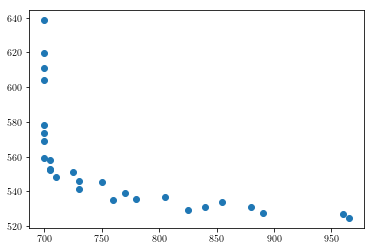

In [687]:
plt.plot(m_f_p,m_p,'o')

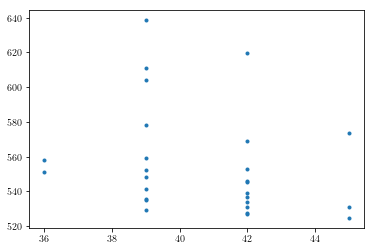

In [688]:
plt.plot(H_p,m_p,'.')

Text(0, 0.5, 'Power [W]')

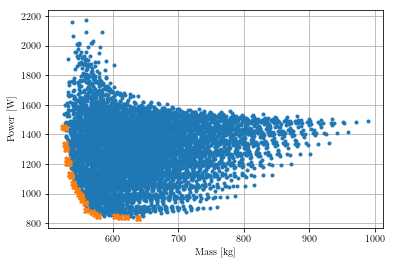

In [689]:
plt.plot(m_T,W_T,'.')
plt.plot(m_p,W_pa,'X')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
#plt.ylim(0,2000)
#plt.xlim(420,900)
#plt.savefig('Optimum.png',format = 'png', dpi=500,bbox_inches='tight')

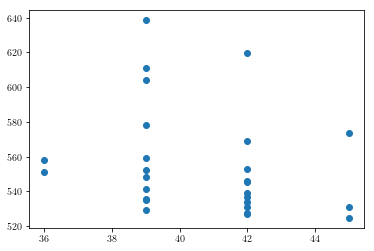

In [692]:
plt.plot(H_p,m_p,'o')

In [626]:
i = 0
Optimal(m_f_p[i]/3600,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i]+273.15,The_p[i]+273.15,L_xt_p[i])

(array([2901.26269646]),
 array([0.14660197]),
 array([0.20911391]),
 array([414.0554805]),
 array([172.85370937]),
 array([133.22449654]),
 array([16.32919528]),
 17.882414242730764,
 array([3448.64844877]),
 0.32999999999999996,
 array([0.93035825]))

In [627]:
Q_c_new = [[] for i in range(len(m_p))]
m_flow_new = [[] for i in range(len(m_p))]


for i in range(len(m_p)):
    m_flow = np.arange(m_f_p[i]+5,1200,5)
    #print(m_f_p[i])
    for j in range(len(m_flow)):
        A = Optimal(m_flow[j]/3600,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i]+273.15,The_p[i]+273.15,L_xt_p[i])
        #print(m_flow[j],A[0],i,j,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i],The_p[i],L_xt_p[i])
        Q_c_new[i].append(A[0])
        m_flow_new[i].append(m_flow[j])

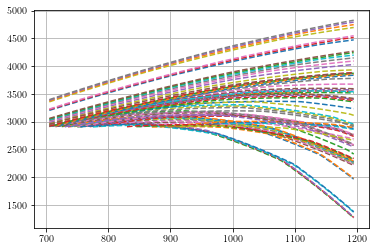

In [628]:
for i in range(len(m_p)):
    plt.plot(m_flow_new[i],Q_c_new[i],'--')
#plt.ylim(2500,4000)
plt.grid()

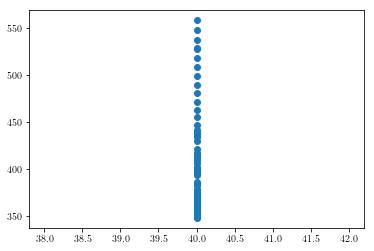

In [629]:
plt.plot(The_p,m_p,'o')

In [630]:
m_3500_100= m_p
W_3500_100 = W_pa

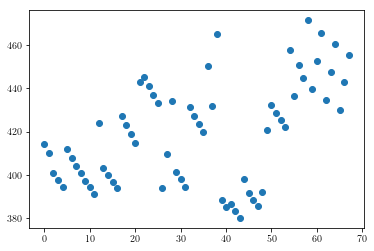

In [631]:
plt.plot(R4_p,'o')

NameError: name 'm_3500' is not defined

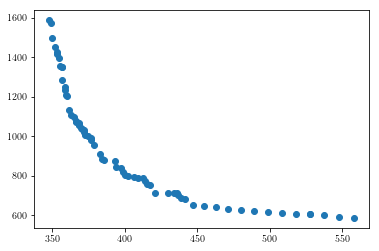

In [632]:
#plt.plot(m_2900,W_2900,'o', label = '$\dot{Q}_\mathrm{C}$ = 2900 W')
#plt.plot(m_3100,W_3100,'o', label = '$\dot{Q}_\mathrm{C}$ = 3100 W')
#plt.plot(m_3300,W_3300,'o', label = '$\dot{Q}_\mathrm{C}$ = 3300 W')
plt.plot(m_3500_100,W_3500_100,'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
plt.plot(m_3500,W_3500,'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
#plt.plot(m_2900_2,W_2900_2,'x', label = '$\dot{Q}_\mathrm{C}$ = 2900 W')
#plt.plot(m_3300_2,W_3300_2,'x', label = '$\dot{Q}_\mathrm{C}$ = 3300 W')
#plt.plot(m_3500_2,W_3500_2,'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
#plt.plot(m_3500_3,W_3500_3,'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
#plt.plot(m_3500_5,W_3500_5,'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
#plt.plot(m_3500_10,W_3500_10,'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
#plt.plot(m_L160,W_L160,'o', label = 'L = 160 mm')
#plt.plot(m_L180,W_L180,'o', label = 'W = 180 mm')

plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
#plt.legend()
plt.savefig('Power_Qc.png',format = 'png', dpi=500,bbox_inches='tight')

In [633]:
plt.plot(m_2900,2900/np.array(W_2900),'o', label = '$\dot{Q}_\mathrm{C}$ = 2900 W')
plt.plot(m_3100,3100/np.array(W_3100),'o', label = '$\dot{Q}_\mathrm{C}$ = 3100 W')
plt.plot(m_3300,3300/np.array(W_3300),'o', label = '$\dot{Q}_\mathrm{C}$ = 3300 W')
plt.plot(m_3500,3500/np.array(W_3500),'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
#plt.plot(m_L160,W_L160,'o', label = 'L = 160 mm')
#plt.plot(m_L180,W_L180,'o', label = 'W = 180 mm')

plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('COP [-]')
plt.legend()
plt.savefig('COP_Qc.png',format = 'png', dpi=500,bbox_inches='tight')

NameError: name 'm_2900' is not defined

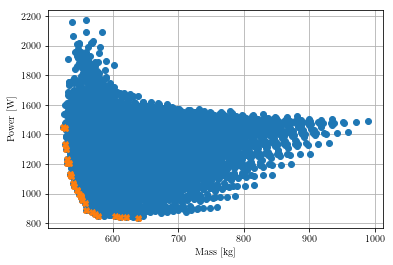

In [693]:
plt.plot(m_T,W_T,'o')
plt.plot(m_p,W_pa,'X')
plt.grid()
#plt.xlim([500,700])
#plt.ylim([1000,2500])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.savefig('Optimum_zoom_1Hz.png',format = 'png', dpi=500,bbox_inches='tight')

In [635]:
dP_AMR = np.array(W_pump)/(np.array(m_f_target)/3600)*1000

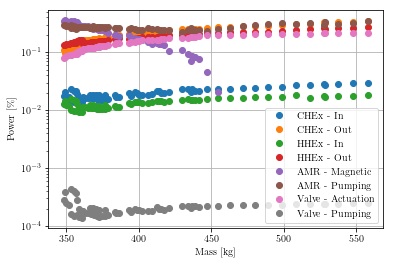

In [636]:
plt.semilogy(m_p,np.array(W_p_CHEx_p)/np.array(W_pa),'o',label = 'CHEx - In')
plt.semilogy(m_p,np.array(W_p_CHEx_f)/np.array(W_pa),'o',label = 'CHEx - Out')
plt.semilogy(m_p,np.array(W_p_HHEx_p)/np.array(W_pa),'o',label = 'HHEx - In')
plt.semilogy(m_p,np.array(W_p_HHEx_f)/np.array(W_pa),'o',label = 'HHEx - Out')
plt.semilogy(m_p,np.array(W_p_mag)/np.array(W_pa),'o',label = 'AMR - Magnetic')
plt.semilogy(m_p,np.array(W_p_pump)/np.array(W_pa),'o',label = 'AMR - Pumping')
plt.semilogy(m_p,np.array(W_pa_valve)/np.array(W_pa),'o',label = 'Valve - Actuation')
plt.semilogy(m_p,np.array(W_pa_p_valve)/np.array(W_pa),'o',label = 'Valve - Pumping')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [$\%$]')
plt.legend()
plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [694]:
workbook = xlsxwriter.Workbook('Optimization_results_15Hz.xlsx')
Data = workbook.add_worksheet('Data')

for i in range(len(m_f_p)):
    Data.write(i,0,m_f_p[i]) 
    Data.write(i,1,FE_p[i])
    Data.write(i,2,f_p[i])
    Data.write(i,3,L_p[i])
    Data.write(i,4,H_p[i])
    Data.write(i,5,W_p[i]) 
    Data.write(i,6,B_max_p[i])
    Data.write(i,7,Tce_p[i])
    Data.write(i,8,The_p[i])
    Data.write(i,9,m_p[i])
    Data.write(i,10,m_Nd_p[i])
    Data.write(i,11,m_La_p[i])
    Data.write(i,12,m_w_p[i])
    Data.write(i,13,W_pa[i])
    Data.write(i,14,W_p_CHEx_p[i])
    Data.write(i,15,W_p_CHEx_f[i])
    Data.write(i,16,W_p_HHEx_p[i])
    Data.write(i,17,W_p_HHEx_f[i])
    Data.write(i,18,W_p_mag[i])
    Data.write(i,19,W_p_pump[i])
    Data.write(i,20,R2_p[i])
    Data.write(i,21,R3_p[i])
    Data.write(i,22,R4_p[i])
    

workbook.close()

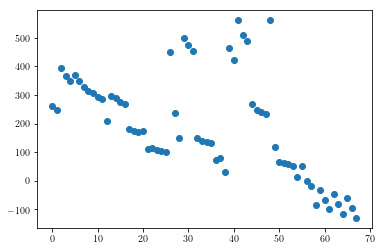

In [638]:
A = W_p_CHEx_f +W_p_CHEx_p
plt.plot(W_p_mag,'o')

In [639]:
W_pa,m_f_p

([1038.109963834268,
  1006.3827554193535,
  1281.9593111872216,
  1232.74344997519,
  1201.4819622958335,
  1246.2220922212723,
  1208.5013025064552,
  1133.8556949592878,
  1107.967385066696,
  1097.0648988909186,
  1069.598836576638,
  1057.1783457492218,
  952.2017878587426,
  1076.7374984972785,
  1066.5525918210642,
  1040.6746631278359,
  1028.999142211585,
  909.9810737577719,
  884.5551856709282,
  877.7156223817722,
  873.2999971085633,
  789.9153284326271,
  788.0589487784231,
  771.8994469110979,
  758.3390132293856,
  751.3952609464271,
  1348.9805883733545,
  981.9484552469722,
  844.9082270374209,
  1415.3836102965838,
  1393.34767168604,
  1351.089491045318,
  836.1270352944457,
  818.4280975591086,
  803.9484018991817,
  796.1117824290271,
  712.2037871483757,
  712.1858004133139,
  653.0702537023493,
  1427.230515007734,
  1353.7865343151802,
  1586.8091634625855,
  1496.8706613130646,
  1451.0364545875902,
  1058.3658082902757,
  1021.5988538967817,
  1002.5066487030

In [640]:
len(W_p_valve)

3748

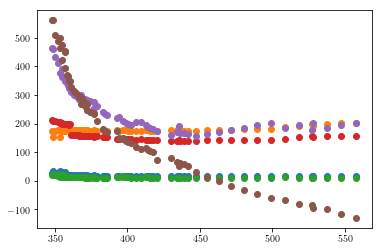

In [641]:
plt.plot(m_p,W_p_CHEx_p,'o')
plt.plot(m_p,W_p_CHEx_f,'o')
plt.plot(m_p,W_p_HHEx_p,'o')
plt.plot(m_p,W_p_HHEx_f,'o')
plt.plot(m_p,W_p_pump,'o')
plt.plot(m_p,W_p_mag,'o')

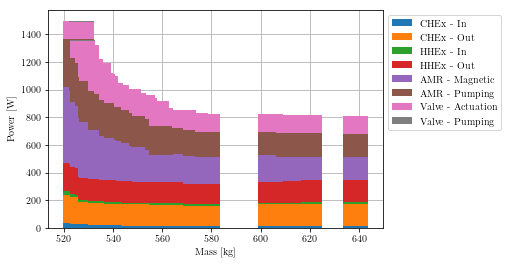

In [695]:
width = 10
plt.grid(zorder = 0)
plt.bar(m_p,W_p_CHEx_p, width, label = 'CHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = W_p_CHEx_p, label = 'CHEx - Out',zorder = 3)
plt.bar(m_p,W_p_HHEx_p, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f), label = 'HHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p), label = 'HHEx - Out',zorder = 3)
plt.bar(m_p,W_p_mag, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f), label = 'AMR - Magnetic',zorder = 3)
plt.bar(m_p,W_p_pump, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) , label = 'AMR - Pumping',zorder = 3)
plt.bar(m_p,W_pa_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f) + np.array(W_p_mag) + np.array(W_p_pump) , label = 'Valve - Actuation',zorder = 3)
plt.bar(m_p,W_pa_p_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) + np.array(W_p_pump)+ np.array(W_pa_valve), label = 'Valve - Pumping',zorder = 3)

#plt.xlim([575,865])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend(bbox_to_anchor = (1,1))
#plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

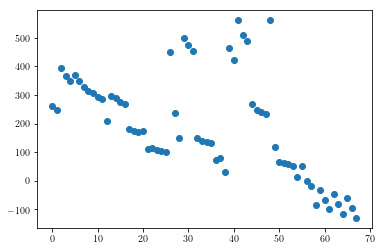

In [645]:
m_Rt_p = np.pi*((np.array(R4_p))**2-np.array(R3_p)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2
m_St_p = np.pi*((np.array(R2_p)**2))*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500
m_Fe_p_10 = np.pi*((np.array(R4_p)+10)**2-np.array(R4_p)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_20 = np.pi*((np.array(R4_p)+20)**2-(np.array(R4_p)+10)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_40 = np.pi*((np.array(R4_p)+40)**2-(np.array(R4_p)+20)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_80 = np.pi*((np.array(R4_p)+80)**2-(np.array(R4_p)+40)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 

In [646]:
L_p

[60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 66,
 66,
 69,
 69,
 72,
 72,
 72,
 75,
 75,
 75,
 78,
 78,
 78]

Text(0.5, 0, 'Power [W]')

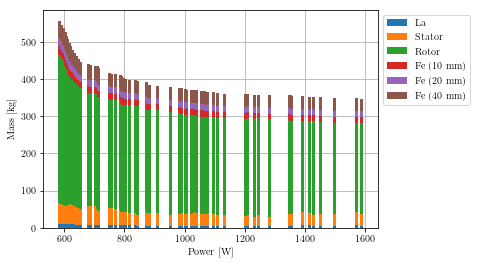

In [647]:
width = 10
plt.grid(zorder = 0)
plt.bar(W_pa,m_La_p, width, label = 'La',zorder = 3)
plt.bar(W_pa,m_St_p, width,bottom = m_La_p, label = 'Stator',zorder = 3)
plt.bar(W_pa,m_Rt_p, width,bottom = np.array(m_La_p) + np.array(m_St_p), label = 'Rotor',zorder = 3)
plt.bar(W_pa,m_Fe_p_10, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p), label = 'Fe (10 mm)',zorder = 3)
plt.bar(W_pa,m_Fe_p_20, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10), label = 'Fe (20 mm)',zorder = 3)
plt.bar(W_pa,m_Fe_p_40, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20), label = 'Fe (40 mm)',zorder = 3)
#plt.bar(W_pa,m_Fe_p_80, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20)+ np.array(m_Fe_p_40), label = 'Fe (80 mm)',zorder = 3)
plt.legend( bbox_to_anchor=[1, 1])
plt.ylabel('Mass [kg]')
plt.xlabel('Power [W]')
#plt.xlim(870,1300)
#plt.ylim(0,1050)
#plt.savefig('Mass_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

array([210.96606473, 209.23671081, 210.24357867, 232.73361722,
       231.5602607 , 233.30933577, 254.43787597, 256.94757966,
       277.88137373, 277.86120317, 301.24571059, 301.82232328,
       237.77764433, 236.42277961, 238.07411002, 261.69292436,
       260.94891535, 286.20177613, 342.34948241, 286.08378413,
       336.96486405, 367.04804164, 380.97055227, 327.03508139,
       392.19267921, 356.4510585 , 422.66362891, 401.75357176,
       434.2986533 , 349.51444863, 424.02552755, 367.5298195 ,
       447.37520275, 368.97306187, 444.10901713, 386.42232878,
       466.73075721, 451.41957484, 490.51169827, 451.87034598,
       472.53420861, 494.34044612, 467.20503116, 489.60638696,
       468.79855475, 485.11040914, 501.91799535, 549.0485839 ,
       597.34894282, 646.80143589, 697.38934412])

In [484]:
m_p,W_pa

([367.402400861069,
  398.345315962042,
  372.8456526475824,
  402.40845718959457,
  433.830910242989,
  467.02856121440635,
  382.8696921207481,
  387.6283174724972,
  410.5044001166666,
  440.2885452611251,
  472.0598790129393,
  505.7040746062123,
  400.2483965202077,
  423.9106349157607,
  451.37742090347405,
  481.2053589737194,
  477.6182089834999,
  466.057065809478,
  484.53539684062144,
  550.3606815764064],
 [1396.2981884921105,
  1067.4647171932024,
  1144.6335372320443,
  962.0860495912351,
  868.9929801223235,
  807.1608771280028,
  1098.4567484250542,
  1077.1504704109616,
  925.5806000591259,
  827.8488879621299,
  796.8268121007104,
  791.5180958874895,
  1062.7096565075608,
  914.3054675665245,
  817.6301261699194,
  791.6362740539375,
  nan,
  nan,
  nan,
  nan])

In [435]:
len(W_pa)

18

ValueError: x and y must have same first dimension, but have shapes (670,) and (216, 1)

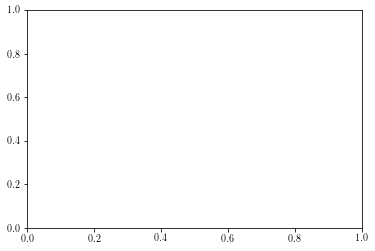

In [44]:
erro_Qc = np.arange(-100,250)
plt.plot(Q_c,np.array(Qc_rg)/16,'o')
plt.plot(erro_Qc,1.1*erro_Qc,'k--')
plt.plot(erro_Qc,0.9*erro_Qc,'k--')
plt.grid()
plt.ylabel('Analytical Cooling Capacity [W]')
plt.xlabel('Numerical Cooling Capacity [W]')
plt.xlim(100,250)
plt.ylim(100,250)
plt.savefig('Qc_fit.png',format = 'png', dpi=500,bbox_inches='tight')

In [ ]:
erro_Qh = np.arange(-100,350)
plt.plot(Q_h,np.array(Qh_rg)/16,'o')
plt.plot(erro_Qh,1.1*erro_Qh,'k--')
plt.plot(erro_Qh,0.9*erro_Qh,'k--')
plt.grid()
plt.ylabel('Analytical Rejected Heat [W]')
plt.xlabel('Numerical Rejected Heat [W]')
plt.xlim(120,300)
plt.ylim(120,300)
plt.savefig('Qh_fit.png',format = 'png', dpi=500,bbox_inches='tight')

In [ ]:
erro_Wp = np.arange(0,25)
plt.plot(W_p,W_pump_rg,'o')

plt.plot(erro_Wp,1.1*erro_Wp,'k--')
plt.plot(erro_Wp,0.9*erro_Wp,'k--')
plt.grid()
plt.ylabel('Analytical Pumping Power [W]')
plt.xlabel('Numerical Pumping Power [W]')
#plt.xlim(120,300)
#plt.ylim(120,300)

### Closure Relations

In [ ]:
plt.plot(N_r,R4,'o')

In [ ]:
plt.plot(H,np.array(R3)-np.array(R2),'o')

Regenerator arranges